In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#load data from google sheets' .csv file
df = pd.read_csv('Survey_Responses.csv')
df

,Timestamp,"first off, which animal is a great pet?",how old are you?,what is your gender?,which class are you in?,are you a transfer student?,did you transfer in any of these quarters? please select which one,what year of study are you in?,what is your major?,when do you usually start your assignments? (assuming assignments were given at least 5 days to be completed)?,...,which of the following is your biggest challenge in school? (choose one),"how does availability of classes affect your academic career? (ie personal stress, gpa, plans to graduate on time etc.)",how overwhelmed are you by the amount of work assigned in cs classes?,would you prefer if ucr provided more core classes to reinforce cs concepts?,"do you feel other major requirement classes affect your performance in your core cs classes (ex having to take a math, physics, or history class along with your cs classes)",How much would you benefit if UCR provided academic resources for upper-division cs classes? (ex supplemental instruction),how would you compare your motivation for this quarter to your motivation for spring 2020,how many assignments are you expected to do each week?,how often did you attend office hours in person previously?,how often do you attend office hours online?
0,12/1/2020 8:27:22,dog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/1/2020 8:36:06,Cat,22,male,both,yes,NaN,year 4/senior,ENCS,started assignments the same week they were as...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/1/2020 8:59:20,rat,20,male,cs 105,no,NaN,year 4/senior,Comp Math,started assignments the same week they were as...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12/1/2020 9:02:25,cats,20,female,both,no,NaN,year 3/junior,computer science,started assignments the same week they were as...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12/1/2020 9:20:14,cat,21,male,cs 111,no,NaN,year 4/senior,computer engineering,started assignments the same week they were as...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,12/1/2020 23:17:03,Dog,19,male,cs 111,no,NaN,year 2/sophomore,CSBA,started assignments the day they were due,...,"personal stress, anxiety, loneliness etc",some impact,somewhat overwhelmed,yes,some impact,1.0,2.0,5,always,rarely (once per quarter/semester)
167,12/1/2020 23:36:33,cats,22,female,cs 111,yes,winter 2020,year 3/junior,Computer Science,started assignments the same week they were as...,...,paying/supporting yourself,no impact,somewhat overwhelmed,yes,some impact,4.0,5.0,4,never,sometimes (monthly)
168,12/2/2020 1:05:58,cat,20,male,cs 111,no,NaN,year 3/junior,CSBA,started assignments the same week they were as...,...,time management,some impact,really overwhelmed,yes,greatly impacts,4.0,1.0,6,rarely (once per quarter/semester),sometimes (monthly)
169,12/2/2020 3:02:14,cat,21,male,cs 111,yes,fall 2020,year 3/junior,computer science,started assignments the same week they were as...,...,"personal stress, anxiety, loneliness etc",some impact,somewhat overwhelmed,NaN,some impact,2.0,1.0,2,never,rarely (once per quarter/semester)


In [3]:
#low level initial cleaning
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df = df.iloc[df['what_is_your_race?_pick_all_that_apply'].first_valid_index():]
df = df.dropna(axis=0,how='all')
df = df.dropna(axis=1,how='all')
df

,timestamp,"first_off,_which_animal_is_a_great_pet?",how_old_are_you?,what_is_your_gender?,which_class_are_you_in?,are_you_a_transfer_student?,did_you_transfer_in_any_of_these_quarters?_please_select_which_one,what_year_of_study_are_you_in?,what_is_your_major?,when_do_you_usually_start_your_assignments?_assuming_assignments_were_given_at_least_5_days_to_be_completed?,...,which_of_the_following_is_your_biggest_challenge_in_school?_choose_one,"how_does_availability_of_classes_affect_your_academic_career?_ie_personal_stress,_gpa,_plans_to_graduate_on_time_etc.",how_overwhelmed_are_you_by_the_amount_of_work_assigned_in_cs_classes?,would_you_prefer_if_ucr_provided_more_core_classes_to_reinforce_cs_concepts?,"do_you_feel_other_major_requirement_classes_affect_your_performance_in_your_core_cs_classes_ex_having_to_take_a_math,_physics,_or_history_class_along_with_your_cs_classes",how_much_would_you_benefit_if_ucr_provided_academic_resources_for_upper-division_cs_classes?_ex_supplemental_instruction,how_would_you_compare_your_motivation_for_this_quarter_to_your_motivation_for_spring_2020,how_many_assignments_are_you_expected_to_do_each_week?,how_often_did_you_attend_office_hours_in_person_previously?,how_often_do_you_attend_office_hours_online?
69,12/1/2020 12:29:45,bird,20,male,cs 111,yes,NaN,year 3/junior,Computer Engineering,started assignments the same week they were as...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,12/1/2020 12:31:05,dog,19,male,both,no,NaN,year 2/sophomore,Computer Science,started assignments the day they were due,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,12/1/2020 12:35:02,dog,22,male,cs 105,no,NaN,year 4/senior,computer science,started assignments the same week they were as...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,12/1/2020 12:35:46,dog,23,male,cs 105,yes,NaN,year 4/senior,Computer Science,started assignments the same week they were as...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,12/1/2020 12:59:03,Dog,28,male,cs 111,yes,fall 2020,year 3/junior,Computer Science,started assignments the same week they were as...,...,paying/supporting yourself,some impact,somewhat overwhelmed,yes,some impact,3.0,3.0,4,rarely (once per quarter/semester),never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,12/1/2020 23:17:03,Dog,19,male,cs 111,no,NaN,year 2/sophomore,CSBA,started assignments the day they were due,...,"personal stress, anxiety, loneliness etc",some impact,somewhat overwhelmed,yes,some impact,1.0,2.0,5,always,rarely (once per quarter/semester)
167,12/1/2020 23:36:33,cats,22,female,cs 111,yes,winter 2020,year 3/junior,Computer Science,started assignments the same week they were as...,...,paying/supporting yourself,no impact,somewhat overwhelmed,yes,some impact,4.0,5.0,4,never,sometimes (monthly)
168,12/2/2020 1:05:58,cat,20,male,cs 111,no,NaN,year 3/junior,CSBA,started assignments the same week they were as...,...,time management,some impact,really overwhelmed,yes,greatly impacts,4.0,1.0,6,rarely (once per quarter/semester),sometimes (monthly)
169,12/2/2020 3:02:14,cat,21,male,cs 111,yes,fall 2020,year 3/junior,computer science,started assignments the same week they were as...,...,"personal stress, anxiety, loneliness etc",some impact,somewhat overwhelmed,NaN,some impact,2.0,1.0,2,never,rarely (once per quarter/semester)


In [4]:
#Limit dataframe to our particular survey questions
df_ours = df.loc[:,'what_is_your_race?_pick_all_that_apply':'people_are_primarily_shaped_by_nature_rather_than_nurture']

#Only include data that answers ALL CRUCIAL ultimatum questions
start_col = df_ours.columns.get_loc('what_amount_of_money_would_you_offer_to_your_partner_if_the_amount_of_money_given_to_you_was_$20?:_your_answer_should_be_some_number_between_0_and_20')
end_col = df_ours.columns.get_loc('10:90_$2_:_$18')
for i in range(start_col,end_col):
    df_ours = df_ours[df_ours.iloc[:,i].notna()]


In [5]:
#Print info before cleaning
print(df_ours.info('vurbose'),'\n')
for i in range(df_ours.shape[1]):
    print(df_ours.iloc[:,i].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 71 to 170
Data columns (total 16 columns):
 #   Column                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                      --------------  -----  
 0   what_is_your_race?_pick_all_that_apply                                                                                                                      86 non-null     object 
 1   have_you_had_or_still_have_a_job?                                                                                                                           65 non-null     object 
 2   have_you_had_or_still_have_a_part_time_job?                                                                                                           

In [6]:
#clean column 0

#Fill nan's
df['what_is_your_race?_pick_all_that_apply'] = df['what_is_your_race?_pick_all_that_apply'].fillna('other')
df['what_is_your_race?_pick_all_that_apply'].unique()

array(['asian', 'other', 'white', 'black, asian',
       'asian, native hawaiian or pacific islander', 'white, asian',
       'white, black', 'hispanic or latino',
       'native hawaiian or pacific islander, hispanic or latino',
       'american indian or alaskan native', 'asian, hispanic or latino',
       'white, hispanic or latino'], dtype=object)

In [7]:
#clean column 2

#Fill nan's
df['have_you_had_or_still_have_a_part_time_job?'] = df['have_you_had_or_still_have_a_part_time_job?'].fillna('no') 

df['have_you_had_or_still_have_a_part_time_job?'].unique()


array(['yes, part time', 'no', 'yes, full time'], dtype=object)

In [8]:
#clean column 3

ind = df_ours.columns.get_loc('if_you_answered_yes_to_the_above_question,_how_many_years_have_you_worked?')
temp_col = df_ours.iloc[:,ind].copy()
#Manually remove words,'years' & 'months', and convert to years
temp_col[temp_col=='4 months'] = str(4/12) 
temp_col[temp_col=='3 months'] = str(3/12)
temp_col = temp_col.str.replace(' ','').str.replace('years','')
#Fill nan's
temp_col = temp_col.fillna('0')
#Convert to float
temp_col = temp_col.astype('float')
df_ours.iloc[:,ind] = temp_col.copy()

df_ours['if_you_answered_yes_to_the_above_question,_how_many_years_have_you_worked?'].unique()

array([0.        , 8.        , 2.        , 1.        , 4.        ,
       5.        , 0.5       , 1.5       , 3.        , 0.33333333,
       0.25      , 6.        , 9.        ])

In [9]:
#clean column 4

#Fill nan's
df_ours['what_income_level_are_you'] = df_ours['what_income_level_are_you'].fillna('im not sure or i prefer not to say')

df_ours['what_income_level_are_you'].unique()


array(['low income (below $50,000)', 'im not sure or i prefer not to say',
       'upper-middle income ($100,000 - $350,000)',
       'middle income ($50,000 - $100,000)',
       'upper income (above $350,000)'], dtype=object)

In [10]:
#clean columns 6

#Strip string
col = df_ours.columns.get_loc('what_amount_of_money_would_you_offer_to_your_partner_if_the_amount_of_money_given_to_you_was_$20?:_your_answer_should_be_some_number_between_0_and_20')
df_ours.iloc[:,col] = df_ours.iloc[:,col].str.replace(' ','').str.replace('$','')
#Convert to float
df_ours.iloc[:,col] = df_ours.iloc[:,col].astype('float')

df_ours.iloc[:,col].unique()


array([10., 11., 20.,  5.,  8.,  9.,  0.,  7., 15.])

In [11]:
#clean columns 7

#Strip string
col = df_ours.columns.get_loc('what_amount_of_money_would_you_offer_to_your_partner_if_the_amount_of_money_given_to_you_was_$1,000?:_your_answer_should_be_some_number_between_0_and_1000')
df_ours.iloc[:,col] = df_ours.iloc[:,col].str.replace(' ','').str.replace('$','').str.replace(',','')
temp = df_ours.iloc[:,col].copy()
#Manually fix incorrect entry
temp[temp=='5000'] = '500'
temp[temp=='1000'] = '100'
df_ours.iloc[:,col] = temp.copy()
#Convert to float
df_ours.iloc[:,col] = df_ours.iloc[:,col].astype('float')

df_ours.iloc[:,col].unique()


array([500., 400., 480., 200., 150.,  10., 100., 350., 600., 300., 750.,
       575., 700.,   0.])

In [12]:
#clean columns 8-12
##Leave as is

In [13]:
#Remove redudant columns
df_ours = df_ours.drop(columns=['have_you_had_or_still_have_a_job?'])

In [14]:
#Print info after cleaning
print(df_ours.info('vurbose'),'\n')
for i in range(df_ours.shape[1]):
    print(df_ours.iloc[:,i].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 71 to 170
Data columns (total 15 columns):
 #   Column                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                      --------------  -----  
 0   what_is_your_race?_pick_all_that_apply                                                                                                                      86 non-null     object 
 1   have_you_had_or_still_have_a_part_time_job?                                                                                                                 92 non-null     object 
 2   if_you_answered_yes_to_the_above_question,_how_many_years_have_you_worked?                                                                            

In [15]:
df_ours

,what_is_your_race?_pick_all_that_apply,have_you_had_or_still_have_a_part_time_job?,"if_you_answered_yes_to_the_above_question,_how_many_years_have_you_worked?",what_income_level_are_you,are_you_familiar_with_the_behavioral_experiment_known_as_the_ultimatum_game?,what_amount_of_money_would_you_offer_to_your_partner_if_the_amount_of_money_given_to_you_was_$20?:_your_answer_should_be_some_number_between_0_and_20,"what_amount_of_money_would_you_offer_to_your_partner_if_the_amount_of_money_given_to_you_was_$1,000?:_your_answer_should_be_some_number_between_0_and_1000",90:10_$18_:_$2,70:30_$14_:_$6,50:50_$10_:_$10,30:70_$6_:_$14,10:90_$2_:_$18,"from_1_to_5,_how_empathetic_would_you_consider_yourself?",people_are_inherently_selfish,people_are_primarily_shaped_by_nature_rather_than_nurture
71,NaN,no,0.00,"low income (below $50,000)",yes,10.0,500.0,reject,reject,accept,reject,reject,4.0,neutral,neutral
73,white,"yes, part time",8.00,"low income (below $50,000)",no,10.0,400.0,accept,accept,accept,accept,accept,3.0,neutral,neutral
74,"black, asian",no,0.00,im not sure or i prefer not to say,no,10.0,400.0,reject,accept,accept,accept,accept,4.0,agree,agree
75,asian,no,0.00,im not sure or i prefer not to say,yes,11.0,400.0,accept,accept,accept,accept,reject,3.0,strongly agree,disagree
76,white,"yes, part time",2.00,im not sure or i prefer not to say,no,10.0,500.0,reject,reject,accept,accept,accept,3.0,agree,disagree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,asian,no,0.00,"low income (below $50,000)",no,10.0,500.0,accept,accept,accept,accept,accept,3.0,strongly agree,neutral
167,asian,"yes, part time",0.25,im not sure or i prefer not to say,no,10.0,500.0,accept,accept,accept,accept,accept,4.0,agree,neutral
168,asian,no,0.00,"middle income ($50,000 - $100,000)",no,7.0,400.0,accept,accept,accept,accept,reject,4.0,neutral,disagree
169,"asian, hispanic or latino","yes, part time",8.00,"middle income ($50,000 - $100,000)",no,10.0,500.0,reject,reject,accept,accept,accept,3.0,neutral,neutral


In [16]:
df_ours = df_ours.rename(columns = {"90:10_$18_:_$2" :"90:10_18:2" ,"70:30_$14_:_$6":"70:30_14:6",
                          "50:50_$10_:_$10":"50:50_10:10","30:70_$6_:_$14":"30:70_6:14",
                          "10:90_$2_:_$18":"10:90_2:18"})
df_ours.keys()

Index(['what_is_your_race?_pick_all_that_apply',
       'have_you_had_or_still_have_a_part_time_job?',
       'if_you_answered_yes_to_the_above_question,_how_many_years_have_you_worked?',
       'what_income_level_are_you',
       'are_you_familiar_with_the_behavioral_experiment_known_as_the_ultimatum_game?',
       'what_amount_of_money_would_you_offer_to_your_partner_if_the_amount_of_money_given_to_you_was_$20?:_your_answer_should_be_some_number_between_0_and_20',
       'what_amount_of_money_would_you_offer_to_your_partner_if_the_amount_of_money_given_to_you_was_$1,000?:_your_answer_should_be_some_number_between_0_and_1000',
       '90:10_18:2', '70:30_14:6', '50:50_10:10', '30:70_6:14', '10:90_2:18',
       'from_1_to_5,_how_empathetic_would_you_consider_yourself?',
       'people_are_inherently_selfish',
       'people_are_primarily_shaped_by_nature_rather_than_nurture'],
      dtype='object')

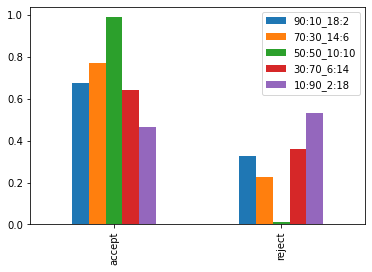

In [17]:
Ninety = df_ours["90:10_18:2"].value_counts() / df_ours["90:10_18:2"].value_counts().sum()
Seventy = df_ours["70:30_14:6"].value_counts() / df_ours["70:30_14:6"].value_counts().sum()
Fifty = df_ours["50:50_10:10"].value_counts() / df_ours["50:50_10:10"].value_counts().sum()
Thirty = df_ours["30:70_6:14"].value_counts() / df_ours["30:70_6:14"].value_counts().sum()
Ten = df_ours["10:90_2:18"].value_counts() / df_ours["10:90_2:18"].value_counts().sum()
comparison = pd.concat([Ninety, Seventy, Fifty, Thirty, Ten], axis = 1)
comparison.plot.bar()

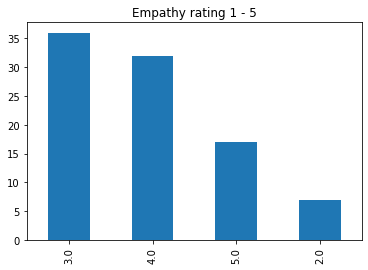

In [18]:
df_ours["from_1_to_5,_how_empathetic_would_you_consider_yourself?"].value_counts().plot.bar(title = "Empathy rating 1 - 5")

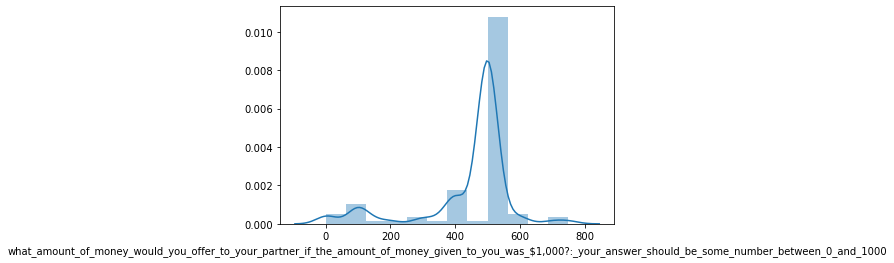

In [19]:
sns.distplot(df_ours['what_amount_of_money_would_you_offer_to_your_partner_if_the_amount_of_money_given_to_you_was_$1,000?:_your_answer_should_be_some_number_between_0_and_1000'], bins = 12)


In [20]:
df_ours['what_amount_of_money_would_you_offer_to_your_partner_if_the_amount_of_money_given_to_you_was_$1,000?:_your_answer_should_be_some_number_between_0_and_1000'].describe()

count     92.000000
mean     441.467391
std      145.573021
min        0.000000
25%      400.000000
50%      500.000000
75%      500.000000
max      750.000000
Name: what_amount_of_money_would_you_offer_to_your_partner_if_the_amount_of_money_given_to_you_was_$1,000?:_your_answer_should_be_some_number_between_0_and_1000, dtype: float64

D:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


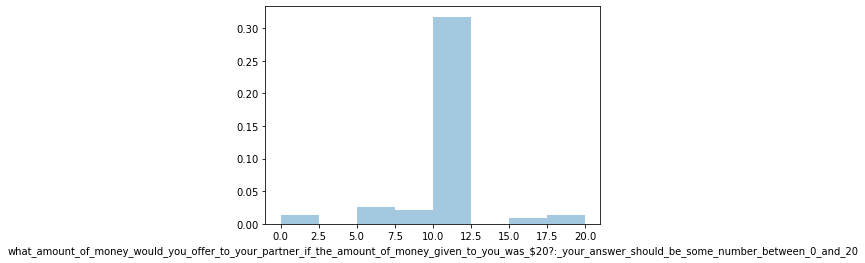

In [34]:
sns.distplot(df_ours['what_amount_of_money_would_you_offer_to_your_partner_if_the_amount_of_money_given_to_you_was_$20?:_your_answer_should_be_some_number_between_0_and_20'], bins = 8)


In [35]:
df_ours['what_amount_of_money_would_you_offer_to_your_partner_if_the_amount_of_money_given_to_you_was_$20?:_your_answer_should_be_some_number_between_0_and_20'].describe()

count    92.000000
mean      9.739130
std       2.927211
min       0.000000
25%      10.000000
50%      10.000000
75%      10.000000
max      20.000000
Name: what_amount_of_money_would_you_offer_to_your_partner_if_the_amount_of_money_given_to_you_was_$20?:_your_answer_should_be_some_number_between_0_and_20, dtype: float64

In [21]:
df_ours.isnull().sum()

what_is_your_race?_pick_all_that_apply                                                                                                                        6
have_you_had_or_still_have_a_part_time_job?                                                                                                                   0
if_you_answered_yes_to_the_above_question,_how_many_years_have_you_worked?                                                                                    0
what_income_level_are_you                                                                                                                                     0
are_you_familiar_with_the_behavioral_experiment_known_as_the_ultimatum_game?                                                                                  0
what_amount_of_money_would_you_offer_to_your_partner_if_the_amount_of_money_given_to_you_was_$20?:_your_answer_should_be_some_number_between_0_and_20         0
what_amount_of_money_would_you_offer_to_

In [22]:
correlation_90_10 = pd.crosstab(df_ours["90:10_18:2"]
                               , df_ours["from_1_to_5,_how_empathetic_would_you_consider_yourself?"])
correlation_70_30 = pd.crosstab(df_ours["70:30_14:6"]
                               , df_ours["from_1_to_5,_how_empathetic_would_you_consider_yourself?"])
correlation_50_50 = pd.crosstab(df_ours["50:50_10:10"]
                               , df_ours["from_1_to_5,_how_empathetic_would_you_consider_yourself?"])
correlation_30_70 = pd.crosstab(df_ours["30:70_6:14"]
                               , df_ours["from_1_to_5,_how_empathetic_would_you_consider_yourself?"])
correlation_10_90 = pd.crosstab(df_ours["10:90_2:18"]
                               , df_ours["from_1_to_5,_how_empathetic_would_you_consider_yourself?"])

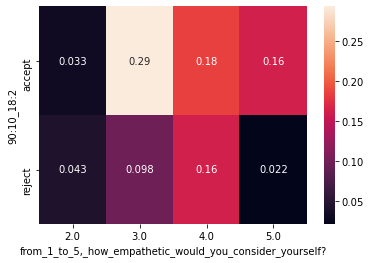

In [23]:
sns.heatmap( correlation_90_10 / correlation_90_10.sum().sum(), annot = True)

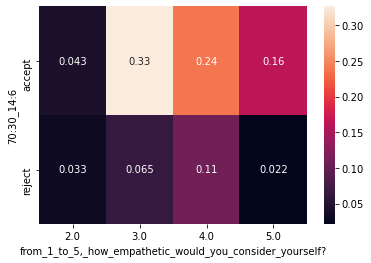

In [24]:
sns.heatmap( correlation_70_30 / correlation_70_30.sum().sum(), annot = True)

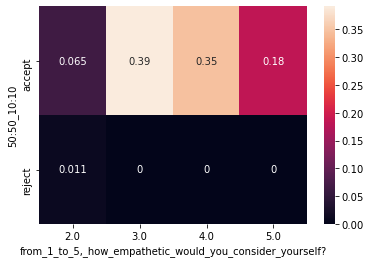

In [25]:
sns.heatmap( correlation_50_50 / correlation_50_50.sum().sum(), annot = True)

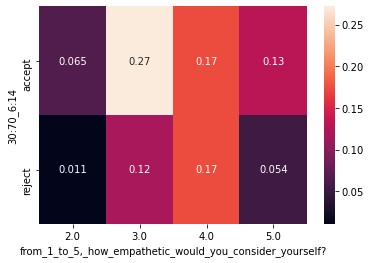

In [26]:
sns.heatmap( correlation_30_70 / correlation_30_70.sum().sum(), annot = True)

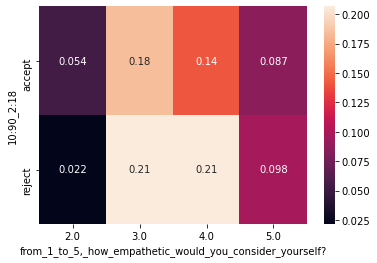

In [29]:
sns.heatmap( correlation_10_90/ correlation_10_90.sum().sum() , annot = True)

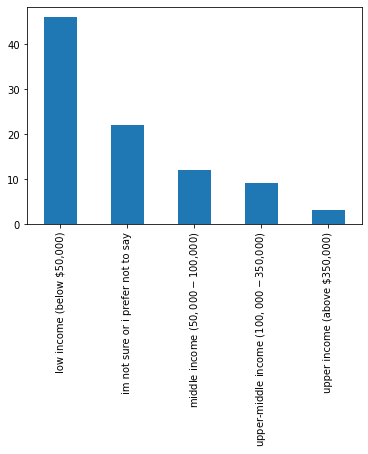

In [41]:
df_ours["what_income_level_are_you"].value_counts().plot.bar()

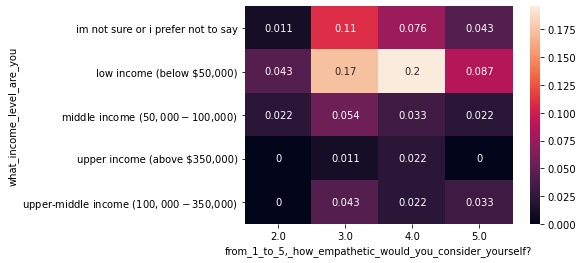

In [46]:
income = pd.crosstab(df_ours["what_income_level_are_you"]
                               , df_ours["from_1_to_5,_how_empathetic_would_you_consider_yourself?"])
sns.heatmap(income / income.sum().sum(), annot = True)

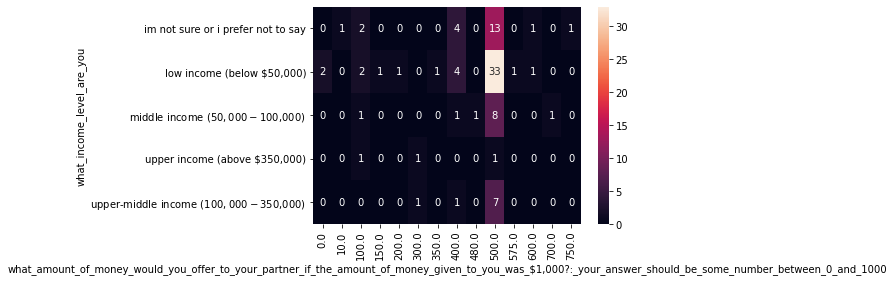

In [45]:
income_2 = pd.crosstab(df_ours["what_income_level_are_you"]
                               , df_ours["what_amount_of_money_would_you_offer_to_your_partner_if_the_amount_of_money_given_to_you_was_$1,000?:_your_answer_should_be_some_number_between_0_and_1000"])
sns.heatmap(income_2, annot = True)